In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/crop_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340


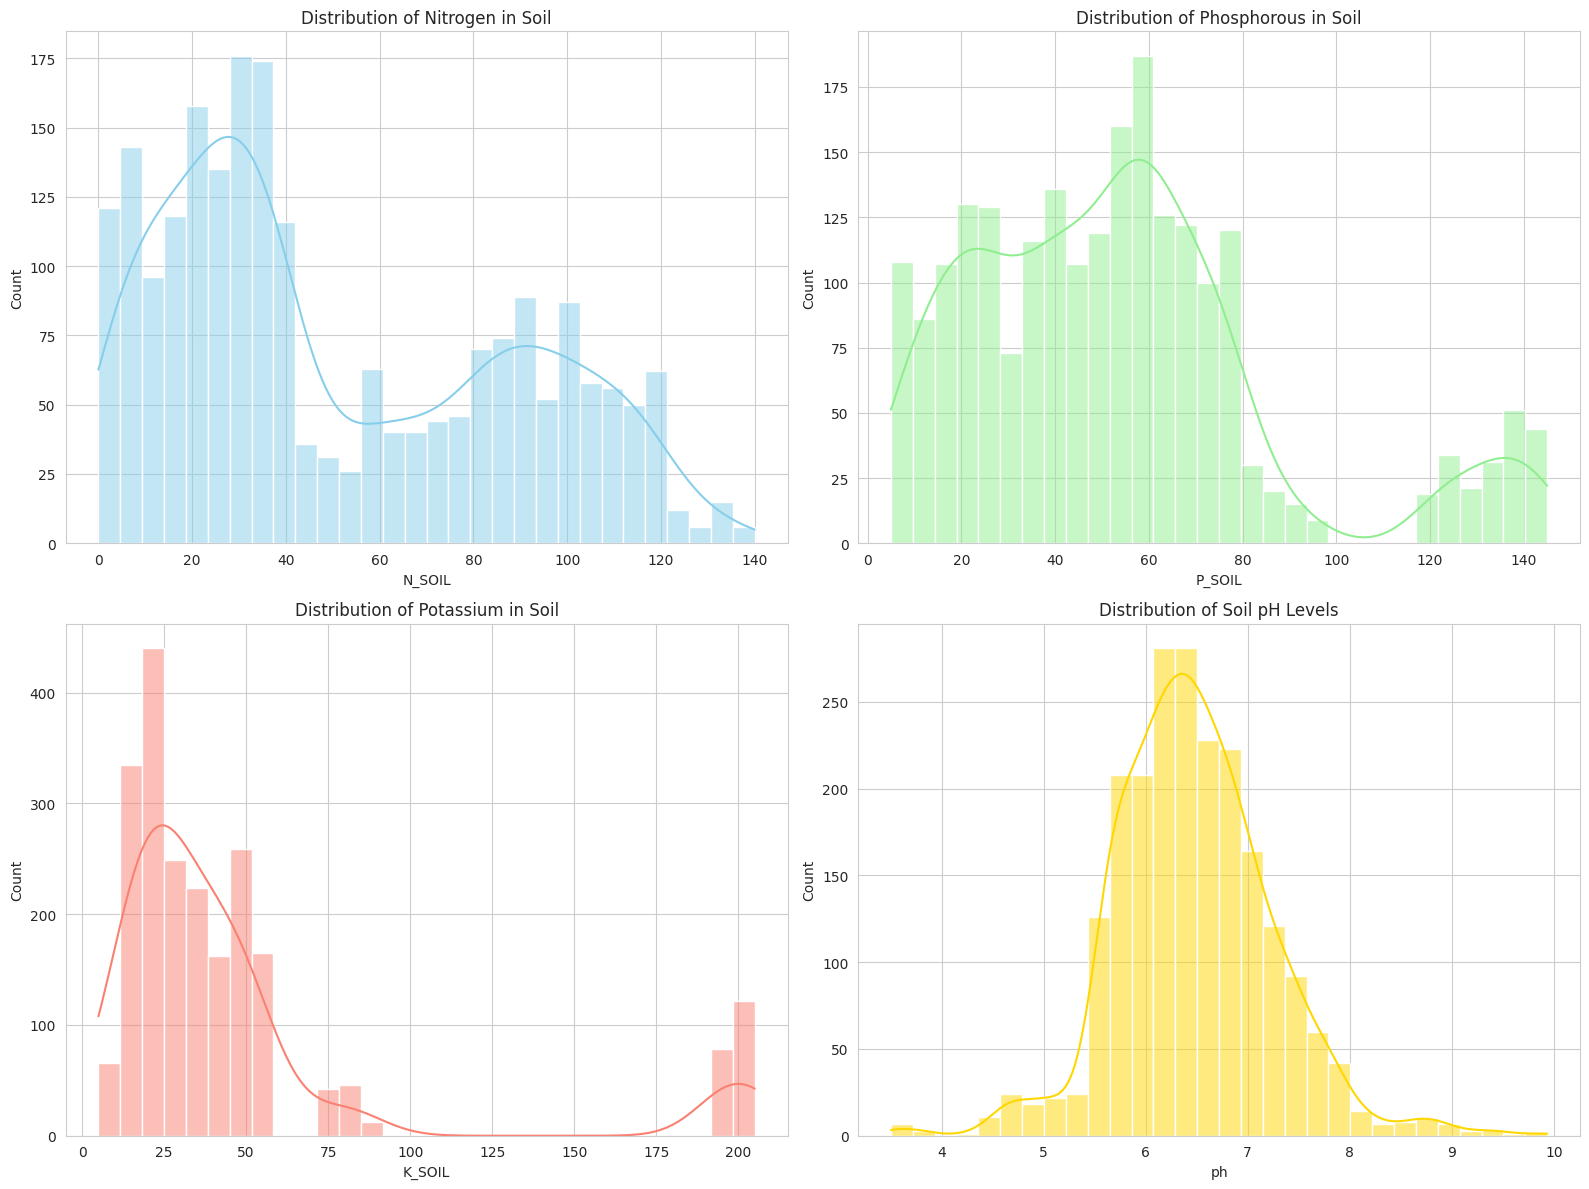

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions and relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of N, P, K soil nutrients
sns.histplot(data['N_SOIL'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Nitrogen in Soil')

sns.histplot(data['P_SOIL'], bins=30, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Phosphorous in Soil')

sns.histplot(data['K_SOIL'], bins=30, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribution of Potassium in Soil')

# pH value distribution
sns.histplot(data['ph'], bins=30, kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Soil pH Levels')

plt.tight_layout()
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder

# Define thresholds for high, medium, low quality based on nutrient content and pH
n_high_threshold, p_high_threshold, k_high_threshold = data['N_SOIL'].quantile(0.7), data['P_SOIL'].quantile(0.7), data['K_SOIL'].quantile(0.7)
n_low_threshold, p_low_threshold, k_low_threshold = data['N_SOIL'].quantile(0.3), data['P_SOIL'].quantile(0.3), data['K_SOIL'].quantile(0.3)

# Function to classify soil quality
def classify_soil_quality(row):
    n, p, k, ph = row['N_SOIL'], row['P_SOIL'], row['K_SOIL'], row['ph']
    if n >= n_high_threshold and p >= p_high_threshold and k >= k_high_threshold and 6.0 <= ph <= 7.5:
        return 'High'
    elif n <= n_low_threshold or p <= p_low_threshold or k <= k_low_threshold or ph < 5.5 or ph > 8.0:
        return 'Low'
    else:
        return 'Medium'

# Apply the function to add a new column for soil quality
data['Soil_Quality'] = data.apply(classify_soil_quality, axis=1)

# Encode the Soil_Type and Soil_Quality as they are categorical
le_soil_type = LabelEncoder()
data['SOIL_TYPE'] = le_soil_type.fit_transform(data['SOIL_TYPE'])

le_soil_quality = LabelEncoder()
data['Soil_Quality'] = le_soil_quality.fit_transform(data['Soil_Quality'])

# Display the modified dataset with the Soil Quality column
data.head()


,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,Soil_Quality
0,Andaman and Nicobar,14,90,42,43,20.879744,82.002744,6.502985,202.935536,2
1,Andaman and Nicobar,14,85,58,41,21.770462,80.319644,7.038096,226.655537,2
2,Andaman and Nicobar,14,60,55,44,23.004459,82.320763,7.840207,263.964248,2
3,Andaman and Nicobar,14,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,Andaman and Nicobar,14,78,42,42,20.130175,81.604873,7.628473,262.717340,2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X = data.drop(['STATE', 'Soil_Quality'], axis=1)  # Features
y = data['Soil_Quality']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

# Dictionary to hold model names and their accuracies for comparison
model_accuracies = {}

# Train and evaluate Decision Tree Classifier
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
model_accuracies['Decision Tree'] = accuracy_score(y_test, dt_pred)

# Train and evaluate Random Forest Classifier
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
model_accuracies['Random Forest'] = accuracy_score(y_test, rf_pred)

# Train and evaluate Support Vector Machine
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
model_accuracies['SVM'] = accuracy_score(y_test, svm_pred)

model_accuracies


{'Decision Tree': 0.9954545454545455,
 'Random Forest': 0.9977272727272727,
 'SVM': 0.8931818181818182}

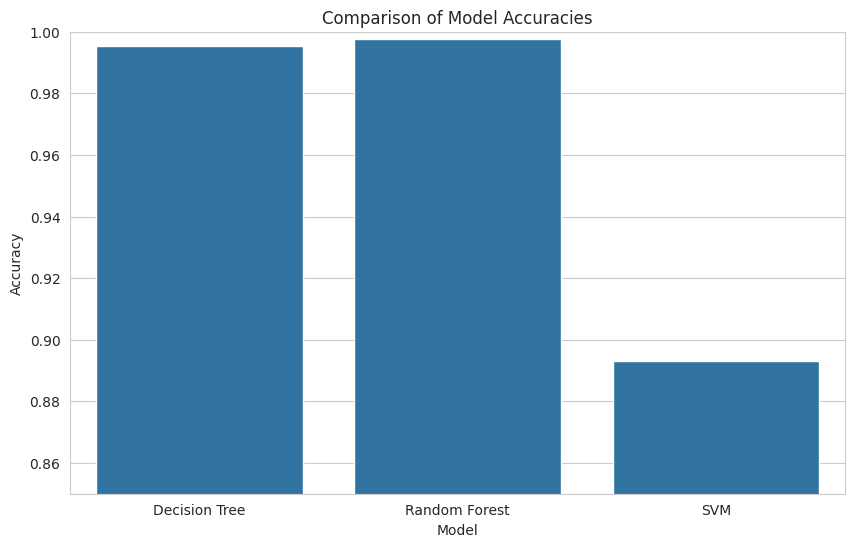

In [5]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.85, 1.0)  # Set the limit to better visualize the differences
plt.show()


In [ ]:
import joblib

# Save the best model (Random Forest Classifier) to a file
model_filename = '/content/random_forest_soil_quality.pkl'
joblib.dump(rf_clf, model_filename)

# Confirm saving
model_filename

In [6]:
import joblib

# Load the saved model
model = joblib.load('/content/random_forest_soil_quality.pkl')

user_input = {
    'SOIL_TYPE': 14,
    'N_SOIL': 85,
    'P_SOIL': 55,
    'K_SOIL': 45,
    'TEMPERATURE': 22.0,
    'HUMIDITY': 80.0,
    'ph': 6.5,
    'RAINFALL': 200.0
}


import pandas as pd
input_df = pd.DataFrame([user_input])

# Make a prediction
prediction = model.predict(input_df)


prediction_label = prediction
print(f"The predicted soil quality is: {prediction_label}")


The predicted soil quality is: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
# Test cases for each soil quality class, using placeholders for SOIL_TYPE and approximations for other values
test_cases = pd.DataFrame([
    {  # High Quality Soil
        'SOIL_TYPE': 1,  # Placeholder value, adapt based on actual encoding
        'N_SOIL': 90,  # Assuming this is higher than 70th percentile
        'P_SOIL': 60,  # Assuming this is higher than 70th percentile
        'K_SOIL': 60,  # Assuming this is higher than 70th percentile
        'TEMPERATURE': 25,
        'HUMIDITY': 50,
        'ph': 6.5,
        'RAINFALL': 100
    },
    {  # Medium Quality Soil
        'SOIL_TYPE': 2,  # Placeholder value
        'N_SOIL': 70,  # Middle range
        'P_SOIL': 50,  # Middle range
        'K_SOIL': 50,  # Middle range
        'TEMPERATURE': 22,
        'HUMIDITY': 60,
        'ph': 5.8,
        'RAINFALL': 150
    },
    {  # Low Quality Soil
        'SOIL_TYPE': 3,  # Placeholder value
        'N_SOIL': 40,  # Assuming this is lower than 30th percentile
        'P_SOIL': 30,  # Assuming this is lower than 30th percentile
        'K_SOIL': 30,  # Assuming this is lower than 30th percentile
        'TEMPERATURE': 10,
        'HUMIDITY': 20,
        'ph': 4.5,
        'RAINFALL': 300
    }
])

# Predicting soil quality for each test case
test_cases_predictions = rf_clf.predict(test_cases)

# Mapping predictions back to quality labels
test_cases['Predicted_Quality'] = le_soil_quality.inverse_transform(test_cases_predictions)

test_cases[['Predicted_Quality']]


,Predicted_Quality
0,Medium
1,Medium
2,Low


In [19]:
import joblib
import sklearn as sk
print(joblib.__version__)
print(sk.__version__)

1.3.2
1.2.2
